# Test

hypergeometric sampling without replacement

* n: number of all participating nodes
* p: ratio of malicious nodes to total
* c: committee size
* s: number of shards
* m: maximal malicious validators can be tolerated in a committee

The security probability drops before 30% of malicious nodes to total.
The more shards we have, the faster the security probability drops.

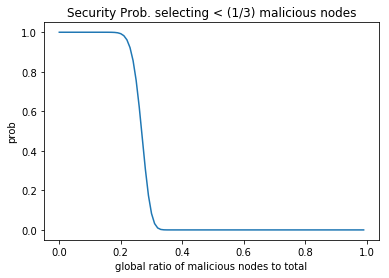

In [106]:
from scipy.stats import hypergeom
import matplotlib.pyplot as plt
import math
import numpy as np

n = 100000
c = 100
s = 10
m = math.floor(c/3)
p = np.arange(0, 1, 0.01)

def security_ratio(x):
    return hypergeom.cdf(m, n, n * x, c) ** s

security_ratios = np.vectorize(security_ratio)

plt.title("Security Prob. selecting < (1/3) malicious nodes")
plt.xlabel("global ratio of malicious nodes to total")
plt.ylabel("prob")
plt.plot(p, security_ratios(p))
plt.show()




With a fixed malicious ratio of 0.28, the security probability becomes stable after 700 size of committee.
The malicious ratio and the size of committe are in direct proportion. A higher malicious ratio would require a large size of committee.
I donnot yet understand why the security prob goes up and down while increasing committee size.

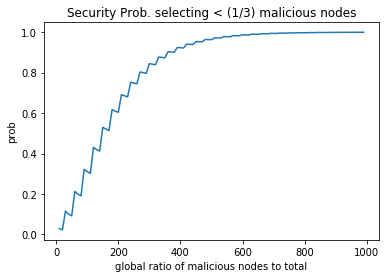

In [105]:
from scipy.stats import hypergeom
import matplotlib.pyplot as plt
import math
import numpy as np

p = 0.28
n = 10000
c = np.arange(10, 1000, 10)
s = 10

def security_ratio(x):
    m = math.floor(x/3)
    return hypergeom.cdf(m, n, n * p, x) ** s

security_ratios = np.vectorize(security_ratio)

plt.title("Security Prob. selecting < (1/3) malicious nodes")
plt.xlabel("global ratio of malicious nodes to total")
plt.ylabel("prob")
plt.plot(c, security_ratios(c))
plt.show()